In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
dataset = pd.read_csv("./dataset.csv")
dataset.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
dataset = dataset.dropna()
dataset = dataset.drop_duplicates()
len(dataset)

1359

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
  dataset.iloc[:, :-1], 
  # dataset[["alcohol", "density", "volatile acidity"]],
  dataset["quality"], 
  train_size=0.8,
  shuffle=True,
  stratify=dataset[["quality"]]
)
len(X_train), len(X_test), len(Y_train), len(Y_test)

(1087, 272, 1087, 272)

## Visualizations

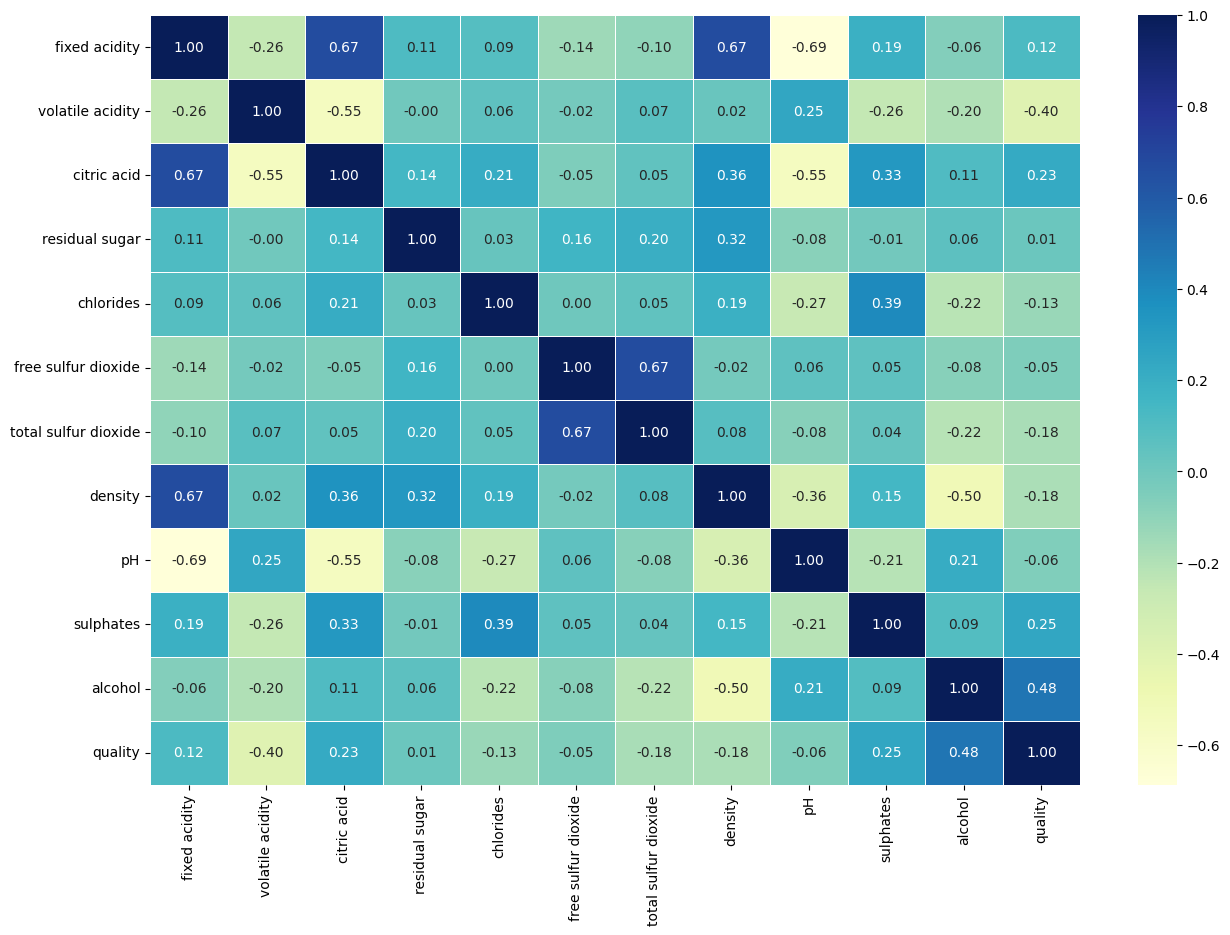

In [7]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(
  corr_matrix,
  annot=True,
  linewidths=0.5,
  fmt=".2f",
  cmap="YlGnBu"
)


1. Alcohol quantity seems to have the maximum positive correlation on the quality, followed by sulphates and citric acid. 
2. Volatile acidity seems to have the maximum negative correlation on the quality, followed by density, total sulphur dioxide and chlorides.

## Modelling

Categorical Classification, <100K samples, Not Text Data -> KNeighbours Classifier -> SVC, Ensemble Classifiers (if previous doesn't work)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
  "Logistic Regression": LogisticRegression(),
  "KNN": KNeighborsClassifier(),
  "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, Y_train, Y_test):
  np.random.seed(42)
  model_scores = {}
  
  for name, model in models.items():
    model.fit(X_train, Y_train)
    model_scores[name] = model.score(X_test, Y_test)

  return model_scores

In [9]:
model_scores = fit_and_score(
  models, X_train, X_test, Y_train, Y_test
)
model_scores

c:\Users\Gowtham\ROOTDIR\Dependencies\Programs\Anaconda\envs\neg-1\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.5661764705882353,
 'KNN': 0.4411764705882353,
 'Random Forest': 0.5735294117647058}

## Improvement Aspects

1. Hyperparameter Tuning
2. Feature Importance
3. Confusion Matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 Score
8. Classification Report
9. ROC Curve
10. AUC Curve

### Hyperparameter Tuning (By Hand) - KNN

Maximum KNN score: 50.73529411764706


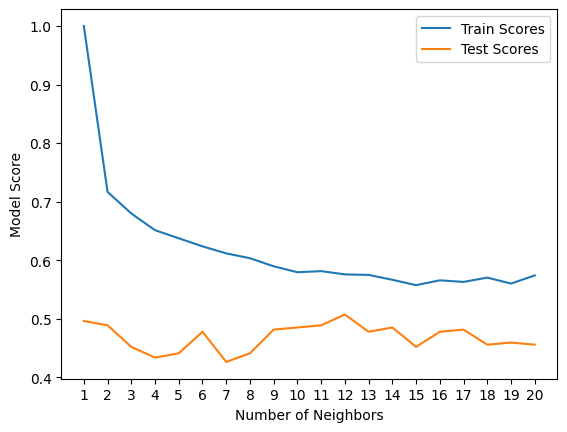

In [10]:
train_scores = []
test_scores = []

# Create list of different values for 'N' neigbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different neigbours
for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(X_train, Y_train)
  train_scores.append(knn.score(X_train, Y_train))
  test_scores.append(knn.score(X_test, Y_test))

plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(F"Maximum KNN score: {max(test_scores)*100}")


## Hyperparameter Tuning by RandomizedSearchCV

In [11]:
# Hyperparameter grid for logistic regression 
log_reg_grid = {
  "C": np.logspace(-4, 4, 20),
  "solver": ["lbfgs"]
 }

# Hyperparameter grid for random forest 
rf_grid = {
 "n_estimators": np.arange(10, 1000, 50),
 "max_depth": [None, 3, 5, 10],
 "min_samples_split": np.arange(2, 20, 2),
 "min_samples_leaf": np.arange(1, 20, 2)
}

*LOGISTIC REGRESSION*

In [12]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

# Setup hyperparamter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(
  LogisticRegression(),
  param_distributions=log_reg_grid,
  cv=5,
  n_iter=20,
  verbose=True
)

rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\Gowtham\ROOTDIR\Dependencies\Programs\Anaconda\envs\neg-1\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Gowtham\ROOTDIR\Dependencies\Programs\Anaconda\envs\neg-1\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['lbfgs']},
                   verbose=True)

In [13]:
rs_log_reg.best_params_

{'solver': 'lbfgs', 'C': 78.47599703514607}

In [14]:
rs_log_reg.score(X_test, Y_test)

0.5661764705882353

*RANDOM FOREST*

In [15]:
np.random.seed(42)

# Setup hyperparamter search for Logistic Regression
rs_rf = RandomizedSearchCV(
  RandomForestClassifier(),
  param_distributions=rf_grid,
  cv=5,
  n_iter=20,
  verbose=True
)

rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [16]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [17]:
rs_rf.score(X_test, Y_test)

0.5735294117647058

## Hyperparameter Tuning by GridSearchCV

*LOGISTIC REGRESSION*

In [23]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for logistic regression 
log_reg_grid = {
  "C": np.logspace(-4, 4, 30),
  "solver": ["lbfgs"]
 }

# Setup grid hyperparameter search for logistic regression
gs_log_reg = GridSearchCV(
  LogisticRegression(),
  param_grid=log_reg_grid,
  cv=5,
  verbose=True
)

gs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Gowtham\ROOTDIR\Dependencies\Programs\Anaconda\envs\neg-1\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Gowtham\ROOTDIR\Dependencies\Programs\Anaconda\envs\neg-1\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Gowtham\ROOTDIR\Dependencies\Programs\Anaconda\envs\neg-1\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIO

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['lbfgs']},
             verbose=True)

In [24]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'lbfgs'}

In [25]:
gs_log_reg.score(X_test, Y_test)

0.5203021718602455